## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.


en entrée : x uniquement

**Idee principale : l' encodeur produit un code latent selon le principe VAE (dimension 6). 
Ce code latent est "divisé" en 2 composantes (maximalement independants de par la contrainte KL).**

les 3 premieres composantes servent à "agir sur le code" :
  - l'action consiste à appliquer une des trois rotations 3D sur le code généré à partir de la composante "identité" invariante. les rotations dans l'espace latent sont ici supposées coder pour des translations dans l'espace des pixels
  
Elles doivent donc selectionner une information spatiale utile à l'encodage de la position.


Les 2 dernieres composantes sont utilisées comme entree d'un classifieur **supervisé**. Elles doivent donc selectionner une information utile à la classification.

La couche intermediaire (dim 256) utile à la classification est ensuite projetee sur un espace de caracteristiques n x 2D. 

**ici n = 64 **


validation du code par reconstruction de x en sortie (BCE Loss)

**Necessite de relaxer la contriante KL pour converger** : KL loss * 0.1

**trois époques semblent ici suffisantes pour apprendre la structure des translations (parfaite correspondance)

**Mais : apres 35 epoques, la reconstruction reste tres "floue" (moins nette qu'avec les translations)...

In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_classif_rot import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'seed': 42, 'epochs': 10, 'no_cuda': True, 'dimension': 25, 'size': 64, 'test_batch_size': 1, 'momentum': 0.48, 'valid_size': 0.2, 'log_interval': 10, 'verbose': 1, 'batch_size': 50, 'std': 1.0, 'mean': 0.0, 'num_processes': 1, 'lr': 0.001}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [5]:
path = '2018-08-01_actionnable_code_VAE_classif_rot_latent256_KL_0_1_code64.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-08-01_actionnable_code_VAE_classif_rot_latent256_KL_0_1_code64.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-08-01_actionnable_code_VAE_classif_rot_latent256_KL_0_1_code64.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE_classif_rot import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7f47f452ea58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f47b9a289b0>)

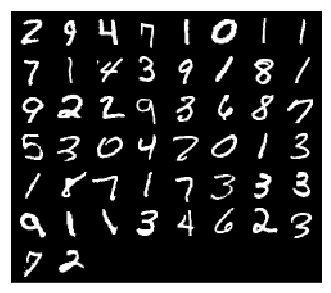

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=6, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=6, bias=False)
  (fc_classif_1): Linear(in_features=3, out_features=256, bias=True)
  (fc_classif_2): Linear(in_features=256, out_features=10, bias=False)
  (fc_z_d1): Linear(in_features=256, out_features=64, bias=True)
  (fc_z_d2): Linear(in_features=256, out_features=64, bias=True)
  (fc_z_d3): Linear(in_features=256, out_features=64, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 151.81	BCE_loss: 2839.77	KL: 0.00	Accuracy: 0.06
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 146.92	BCE_loss: 1770.46	KL: 0.01	Accuracy: 0.20
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 149.41	BCE_loss: 694.78	KL: 0.06	Accuracy: 0.16
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 149.33	BCE_loss: 451.83	KL: 0.01	Accuracy: 0.14
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 148.95	BCE_loss: 454.43	KL: 0.01	Accuracy: 0.08
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 147.80	BCE_loss: 456.18	KL: 0.03	Accuracy: 0.10
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 148.12	BCE_loss: 420.37	KL: 0.04	Accuracy: 0.10
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 148.26	BCE_loss: 417.77	KL: 0.00	Accuracy: 0.16
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 149.65	BCE_loss: 411.54	KL: 0.01	Accuracy: 0.12
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 148.79	BCE_loss: 429.29	KL: 0.03	Accuracy: 0.04
	Train Epoch: 1 [5000/60000 (8

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 104.09	BCE_loss: 395.50	KL: 7.35	Accuracy: 0.38
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 116.22	BCE_loss: 418.20	KL: 6.65	Accuracy: 0.16
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 113.46	BCE_loss: 391.61	KL: 8.66	Accuracy: 0.22
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 124.11	BCE_loss: 396.99	KL: 7.78	Accuracy: 0.24
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 114.02	BCE_loss: 410.31	KL: 9.40	Accuracy: 0.24
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 109.04	BCE_loss: 383.76	KL: 8.24	Accuracy: 0.34
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 112.18	BCE_loss: 423.27	KL: 8.78	Accuracy: 0.30
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 110.54	BCE_loss: 414.30	KL: 8.78	Accuracy: 0.26
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 120.55	BCE_loss: 395.63	KL: 7.66	Accuracy: 0.24
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 124.67	BCE_loss: 428.68	KL: 7.75	Accuracy: 0.14
	Train Epoch: 1 [470

	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 111.71	BCE_loss: 399.39	KL: 9.38	Accuracy: 0.34
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 94.16	BCE_loss: 410.75	KL: 9.32	Accuracy: 0.24
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 99.14	BCE_loss: 384.44	KL: 9.57	Accuracy: 0.34
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 89.88	BCE_loss: 422.41	KL: 9.13	Accuracy: 0.44
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 93.90	BCE_loss: 384.61	KL: 8.58	Accuracy: 0.32
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 99.56	BCE_loss: 408.38	KL: 8.62	Accuracy: 0.34
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 90.64	BCE_loss: 386.30	KL: 9.17	Accuracy: 0.40
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 102.98	BCE_loss: 426.16	KL: 10.33	Accuracy: 0.36
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 101.66	BCE_loss: 390.02	KL: 8.88	Accuracy: 0.30
	Train Epoch: 2 [29000/60000 (48%)]	classif Loss: 92.42	BCE_loss: 405.93	KL: 8.35	Accuracy: 0.42
	Train Epoch: 2 [29500/600

Process Process-3:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
ml.train(None)

In [ ]:
ml.train(None)

In [ ]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
-32 -32
[[-0.01511929  0.01121944]] [[-0.02600734  1.05524503]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


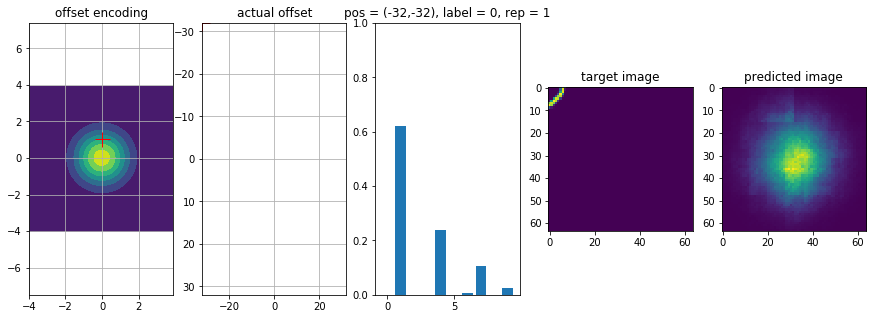

torch.Size([50, 1, 28, 28])
-28 -28
[[-0.00082574  0.01123617]] [[ 0.05665331 -1.00063912]]


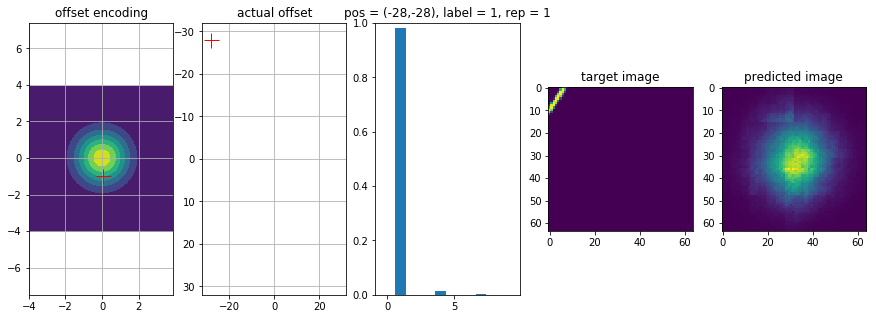

torch.Size([50, 1, 28, 28])
-24 -24
[[-0.03455577  0.02952848]] [[-2.8907299  -1.73121134]]


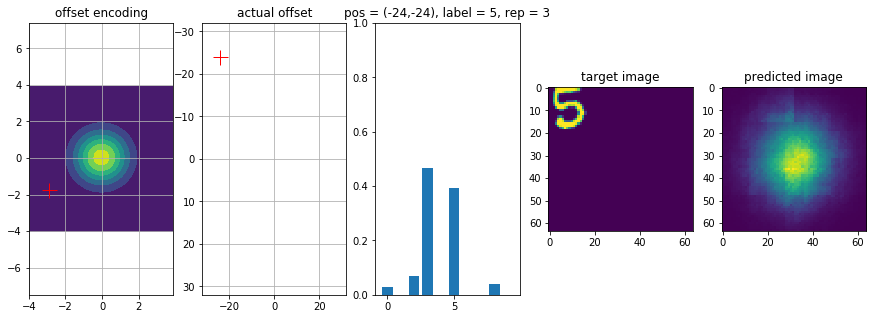

torch.Size([50, 1, 28, 28])
-20 -20
[[-0.02045184 -0.00150299]] [[ 1.33533227  1.22624513]]


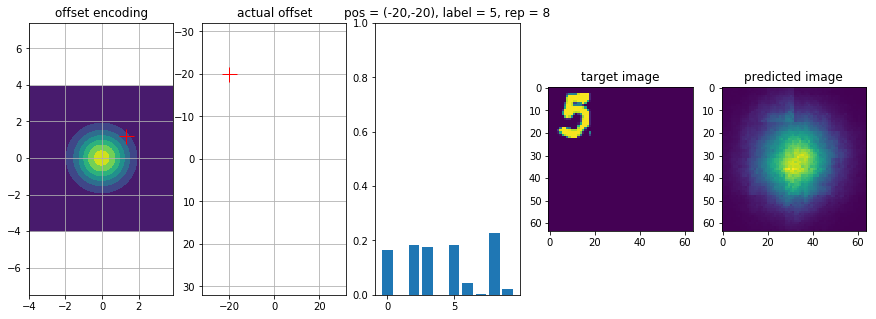

torch.Size([50, 1, 28, 28])
-16 -16
[[-0.02923053  0.00776961]] [[ 2.33276248  0.74482046]]


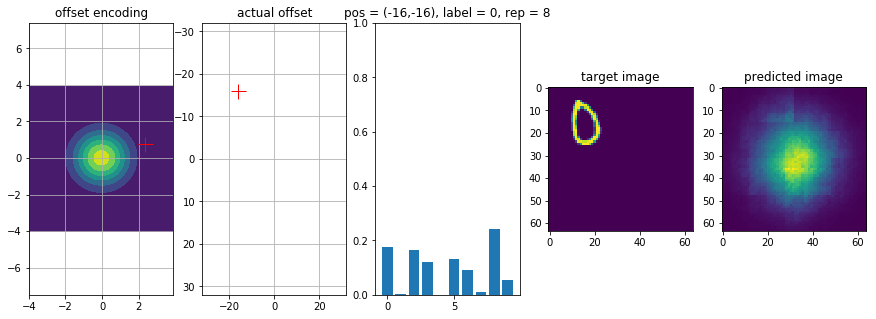

torch.Size([50, 1, 28, 28])
-12 -12
[[-0.01625415  0.00109831]] [[-1.25681546  0.7464916 ]]


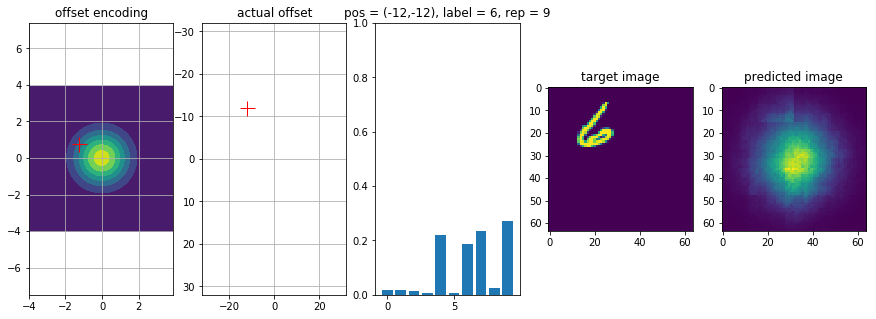

torch.Size([50, 1, 28, 28])
-8 -8
[[-0.02232463  0.00658688]] [[ 0.45046003  0.79072624]]


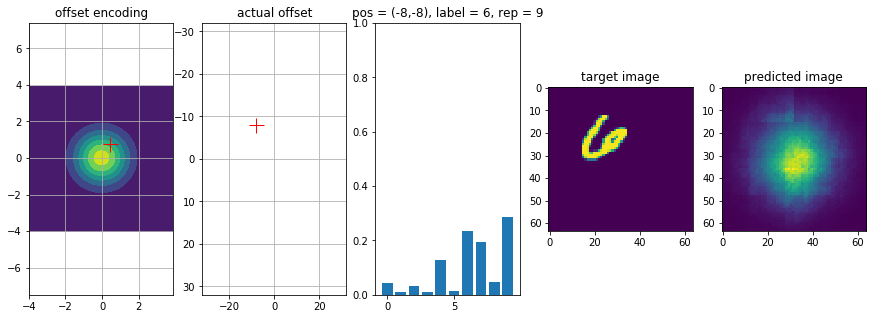

torch.Size([50, 1, 28, 28])
-4 -4
[[-0.01567567  0.00781504]] [[ 0.21879328 -1.4873791 ]]


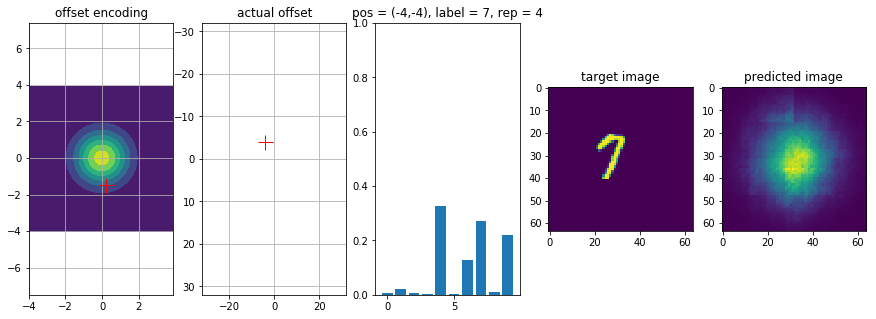

torch.Size([50, 1, 28, 28])
0 0
[[-0.01192596  0.01214252]] [[-0.45022276 -0.98764191]]


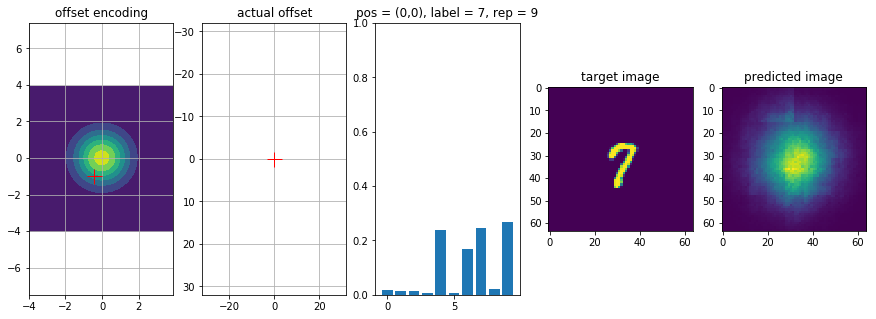

torch.Size([50, 1, 28, 28])
4 4
[[-0.02133608  0.00740221]] [[  1.43745563e+00   1.22173659e-03]]


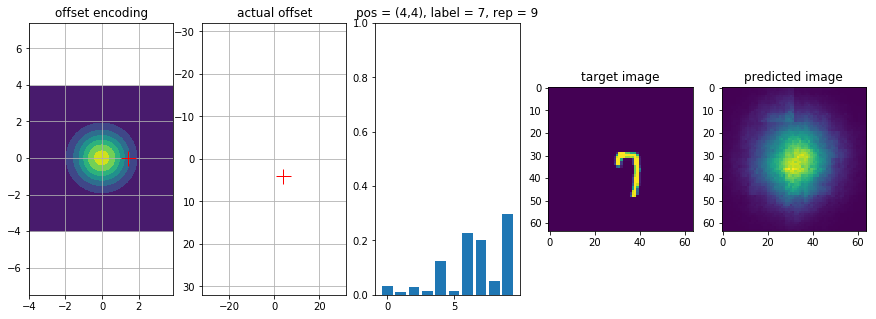

torch.Size([50, 1, 28, 28])
8 8
[[-0.02197683  0.00010241]] [[ 0.94958613  0.48518862]]


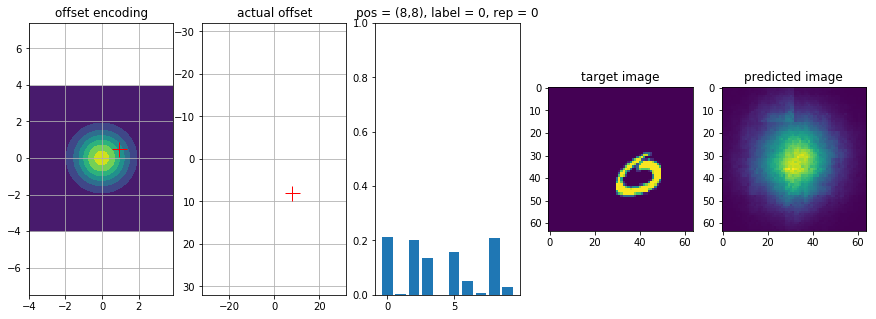

torch.Size([50, 1, 28, 28])
12 12
[[-0.02132931  0.02956089]] [[-0.96669436 -0.2492325 ]]


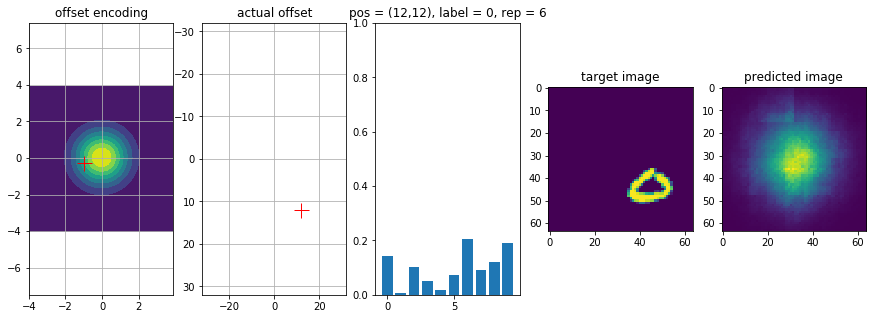

torch.Size([50, 1, 28, 28])
16 16
[[-0.04243391  0.01695772]] [[-0.22871709  1.34155098]]


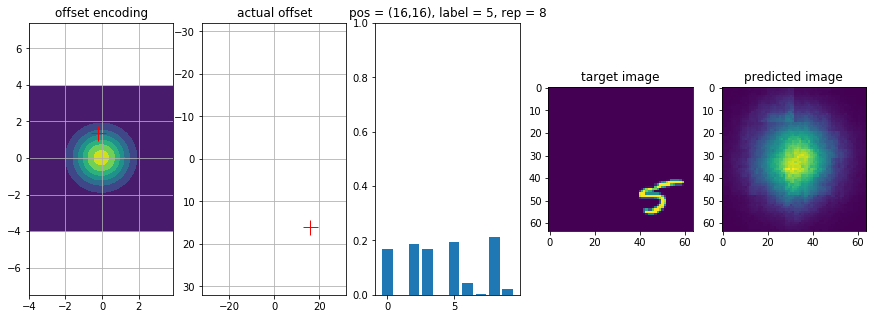

torch.Size([50, 1, 28, 28])
20 20
[[-0.03815775  0.03740439]] [[ 1.91158264 -0.68017822]]


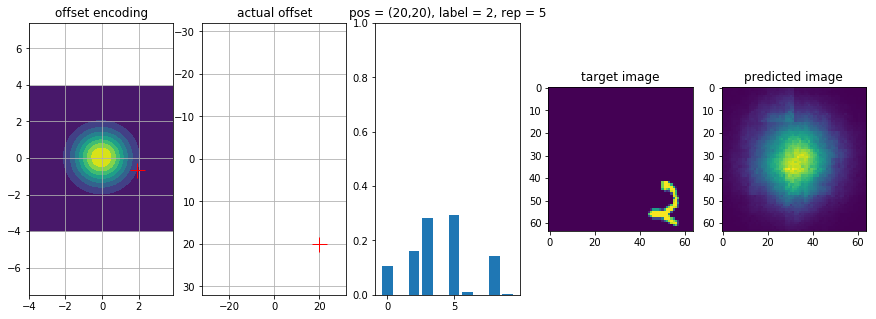

torch.Size([50, 1, 28, 28])
24 24
[[-0.03283626  0.02432341]] [[ 1.37989071 -1.25748727]]


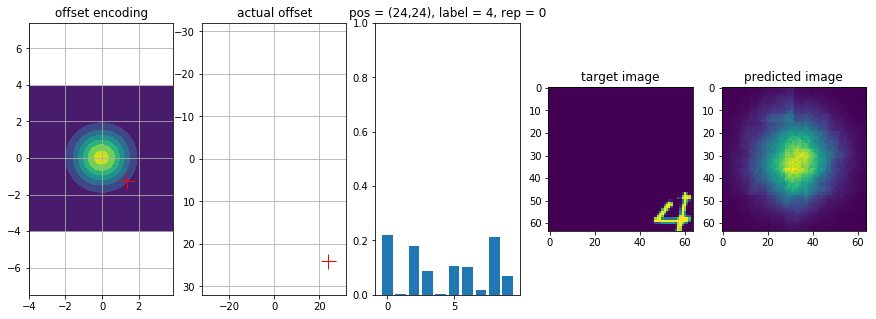

torch.Size([50, 1, 28, 28])
28 28
[[-0.04425396  0.03805576]] [[ 0.72842829 -0.20786644]]


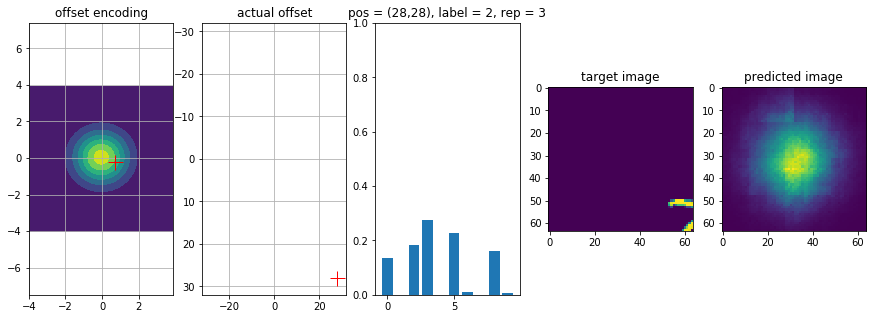

In [16]:
%matplotlib inline
import torch

from Where_act_code_VAE_classif_rot import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = _
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    x_hat_logit_output, mu_output, logvar_output, u_output, z_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[:5]
    ax[4].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[4].set_title('predicted image')
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output[:,1:3].detach().numpy()
    mu_offset = mu_output[:,1:3].detach().numpy()
    logvar_offset = logvar_output[:,1:3].detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    '''ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')'''
    rep = torch.argmax(z_hat_logit_output).detach().numpy()
    ax[2].bar(np.arange(10), F.softmax(z_hat_logit_output[0,:]).detach().numpy())
    ax[2].set_ylim([0,1])
    ax[2].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

In [ ]:
from Where_act_code_VAE_classif_rot import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(-32,32,4):
    #label[idx] = z
    idx = 3
    print(label[idx])
    i_offset = _
    j_offset = 0 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    z, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[4:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)

In [ ]:
torch.distributions.multinomial.Multinomial(